
<img style="float: left;;" src='Figures/alinco.png' /></a>
    

# <center> <font color= #000047> Aprendizaje Superviado: Regresión Lineal & Logistica </font> </center>


<div class="alert alert-danger" style="margin: 10px"><strong>NOTA IMPORTANTE!</strong> Esta actividad no es obligatoria para entregar. si se entrega antes del domingo 21/09/2025, se considerará un punto para la calificación final.</div>

#### Ejercicio 1: Considere el dataset `Position_Salaries.csv` en la carpeta Data, y realize lo que se pide:

- Crear una regresión polinomial para obtener un modelo polinomial de grado 3. 
- Predecir los siguientes niveles: x_new=[11, 13, 15]
- Graficar los salarios de los valores de x_new

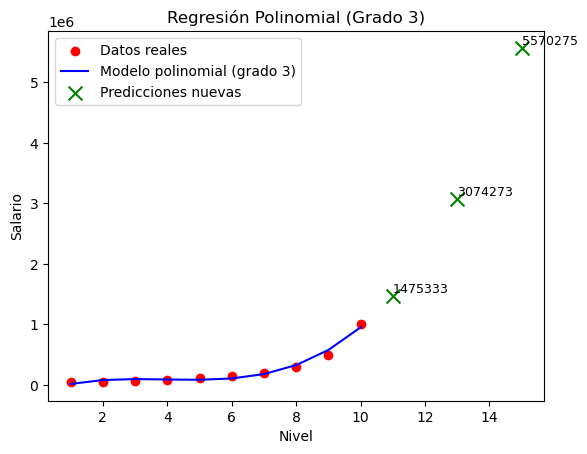

Predicciones para x_new: [1475333.33333331 3074272.72727266 5570275.05827491]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv("Position_Salaries.csv")
X = dataset[['Level']].values
y = dataset['Salary'].values

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

x_new = np.array([11, 13, 15]).reshape(-1, 1)
x_new_poly = poly_reg.transform(x_new)
y_pred_new = lin_reg.predict(x_new_poly)

plt.scatter(X, y, color='red', label='Datos reales')
plt.plot(X, lin_reg.predict(X_poly), color='blue', label='Modelo polinomial (grado 3)')
plt.scatter(x_new, y_pred_new, color='green', s=100, marker='x', label='Predicciones nuevas')

for i, val in enumerate(y_pred_new):
    plt.text(x_new[i], val, f"{val:.0f}", fontsize=9, ha='left', va='bottom')

plt.title('Regresión Polinomial (Grado 3)')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.legend()
plt.show()

print("Predicciones para x_new:", y_pred_new)

#### Ejercicio 2: Considere el dataset `apples_and_oranges.csv` en la carpeta Data, y realize lo que se pide:
- Crear un modelo de regresión logística
- predecir una nueva entrada x_new=[[70.5, 5.1],[65, 4.1]]
- Graficar los nuevos datos con su predicción

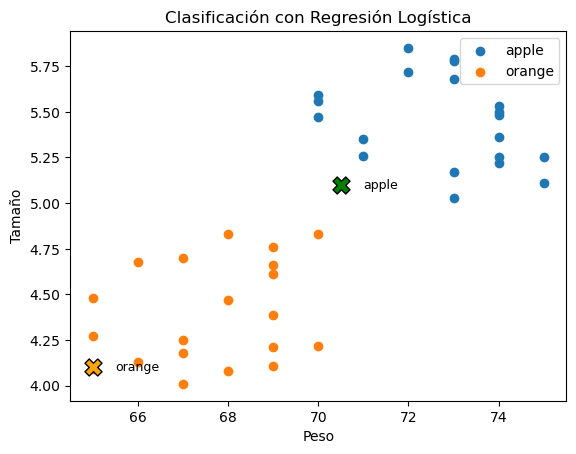

Predicciones para x_new: ['apple' 'orange']


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv("apples_and_oranges.csv")

X = dataset[['Weight', 'Size']].values
y = dataset['Class'].values

le = LabelEncoder()
y_encoded = le.fit_transform(y)

clf = LogisticRegression()
clf.fit(X, y_encoded)

x_new = np.array([[70.5, 5.1], [65, 4.1]])
y_pred_new = clf.predict(x_new)
y_pred_labels = le.inverse_transform(y_pred_new)

for label in np.unique(y):
    plt.scatter(X[y==label, 0], X[y==label, 1], label=label)

colors = ['green' if label=='apple' else 'orange' for label in y_pred_labels]
for i, (point, label) in enumerate(zip(x_new, y_pred_labels)):
    plt.scatter(point[0], point[1], color=colors[i], marker='X', s=150, edgecolor='black')
    plt.text(point[0]+0.5, point[1], label, fontsize=9, va='center')

plt.xlabel('Peso')
plt.ylabel('Tamaño')
plt.title('Clasificación con Regresión Logística')
plt.legend()
plt.show()

print("Predicciones para x_new:", y_pred_labels)